In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/eglantineclervil/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/eglantineclervil/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/eglantineclervil/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/eglantineclervil/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
ratings = pd.read_csv('Books_rating.csv')

## Exploratory Data Analysis

In [3]:
ratings = ratings.head(500)

In [4]:
ratings.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  500 non-null    object 
 1   Title               500 non-null    object 
 2   Price               130 non-null    float64
 3   User_id             369 non-null    object 
 4   profileName         369 non-null    object 
 5   review/helpfulness  500 non-null    object 
 6   review/score        500 non-null    float64
 7   review/time         500 non-null    int64  
 8   review/summary      500 non-null    object 
 9   review/text         500 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 39.2+ KB


In [ ]:
# Drop values that are not useful for my analysis

In [6]:
ratings = ratings.drop(['profileName', 'User_id', 'Id', 'Price', 'review/time', 'review/summary'], axis=1)

In [7]:
# Verify if it is done right
ratings.head(1)

,Title,review/helpfulness,review/score,review/text
0,Its Only Art If Its Well Hung!,7/7,4.0,This is only for Julie Strain fans. It's a col...


In [8]:
ratings = ratings.rename(columns={
    'review/score': 'Score',
    'review/text': 'Text',
    'review/helpfulness':'Helpfulness'
})

In [9]:
# Checj ratings once more
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        500 non-null    object 
 1   Helpfulness  500 non-null    object 
 2   Score        500 non-null    float64
 3   Text         500 non-null    object 
dtypes: float64(1), object(3)
memory usage: 15.8+ KB


In [10]:
# Checking for any N/A values
ratings.isnull().sum()

Title          0
Helpfulness    0
Score          0
Text           0
dtype: int64

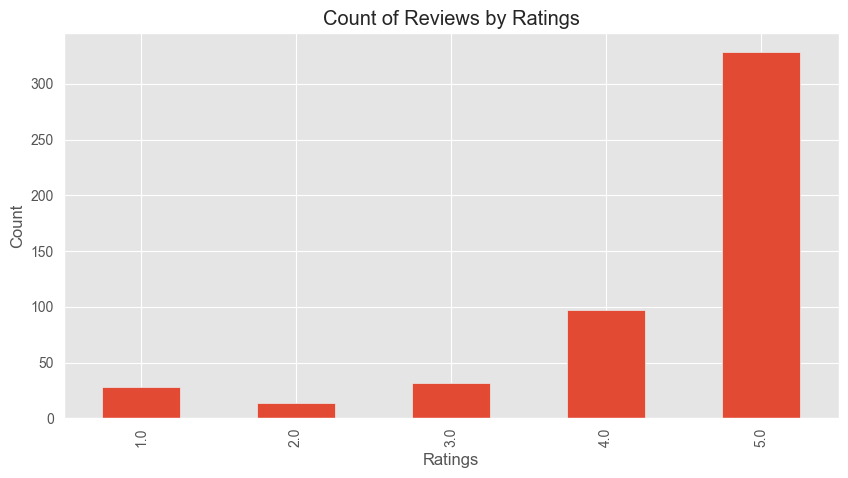

In [11]:
ratings_plot = (ratings['Score']
      .value_counts()
      .sort_index()
      .plot(kind='bar', title='Count of Reviews by Ratings', figsize=(10, 5)))
ratings_plot.set_xlabel('Ratings')
ratings_plot.set_ylabel('Count')
plt.show()

### Distribution of Ratings interpretation
The majority of reviews have a rating of **5**, which indicates that most people left highly positive reviews.
Ratings of **4** are the next most frequent, but they are significantly fewer than the **5-star** ratings, whereas ratings of **1**, **2**, and **3** are very sparse, indicating fewer negative or average reviews.

In [12]:
ratings['Score'].describe()

count    500.000000
mean       4.370000
std        1.097045
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Score, dtype: float64

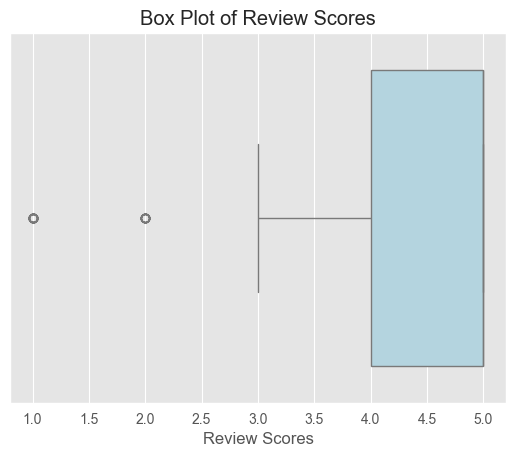

In [13]:
sns.boxplot(x=ratings['Score'], color='lightblue')
plt.title('Box Plot of Review Scores')
plt.xlabel('Review Scores')
plt.show()

### Interpretation
1. **Central Tendency (Median)**:
   - The **median** is around **4.5 stars**, which means that most reviews are high.

2. **Spread (IQR)**:
   - The **box** extends roughly from **4.0 to 5.0**, therefore 50% of the reviews are concentrated in this range. Consequently, the majority of ratings are high.

3. **Whiskers**:
   - The lower whisker ends at **3.0**, which is the minimum rating excluding outliers.
   - The upper whisker touches **5.0**, showing that the maximum rating is a perfect score.

### Conclusion
- The majority of books or items are rated highly, as indicated by the tight range between **4.0 and 5.0** (IQR). This suggests overall satisfaction.
- While most reviews are positive, the presence of **1.0 and 2.0 star outliers** shows that some customers were highly dissatisfied, though these cases are rare.

## Sentiment Analysis

In [14]:
# Create an Id column for later
ratings['Id'] = ratings.reset_index().index + 1

In [16]:
text = ratings['Text'][50]
print(text)

This is a very useful and thorough text book. I would recommend it for anyone who wants an in depth study of the Lord's church.


In [17]:
# Let's analyze the first sentence
tokens = nltk.word_tokenize(text)
tokens[:10]

['This', 'is', 'a', 'very', 'useful', 'and', 'thorough', 'text', 'book', '.']

In [18]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('useful', 'JJ'),
 ('and', 'CC'),
 ('thorough', 'JJ'),
 ('text', 'NN'),
 ('book', 'NN'),
 ('.', '.')]

In [19]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  a/DT
  very/RB
  useful/JJ
  and/CC
  thorough/JJ
  text/NN
  book/NN
  ./.
  I/PRP
  would/MD
  recommend/VB
  it/PRP
  for/IN
  anyone/NN
  who/WP
  wants/VBZ
  an/DT
  in/IN
  depth/NN
  study/NN
  of/IN
  the/DT
  (ORGANIZATION Lord/NNP)
  's/POS
  church/NN
  ./.)


In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# Create a sentiment intensity analyzer object
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/eglantineclervil/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
# Check polarity score
sia.polarity_scores(text)

{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.6901}

In [23]:
from tqdm import tqdm

# Calculate the sentiment score for each review of the data frame
res = {}
for i, row in tqdm(ratings.iterrows(), total=len(ratings)):
    text = row['Text']
    text_id = row['Id']
    res[text_id] = sia.polarity_scores(text)

100%|██████████| 500/500 [00:00<00:00, 825.31it/s]


In [24]:
# Create column for sentiment scores for future purposes
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(ratings, how='left')

In [25]:
vaders.head()

,Id,neg,neu,pos,compound,Title,Helpfulness,Score,Text
0,1,0.013,0.781,0.206,0.9408,Its Only Art If Its Well Hung!,7/7,4.0,This is only for Julie Strain fans. It's a col...
1,2,0.045,0.790,0.165,0.9876,Dr. Seuss: American Icon,10/10,5.0,I don't care much for Dr. Seuss but after read...
2,3,0.026,0.806,0.168,0.9935,Dr. Seuss: American Icon,10/11,5.0,"If people become the books they read and if ""t..."
3,4,0.034,0.884,0.083,0.9807,Dr. Seuss: American Icon,7/7,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,5,0.061,0.799,0.140,0.9803,Dr. Seuss: American Icon,3/3,4.0,Philip Nel - Dr. Seuss: American IconThis is b...


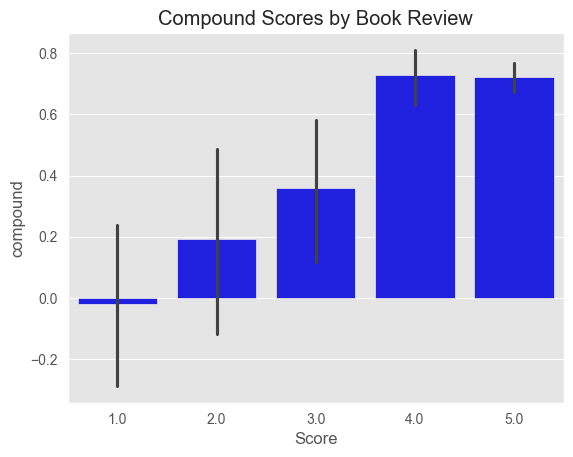

In [26]:
ax = sns.barplot(data=vaders, x='Score', y='compound', color='blue')
ax.set_title('Compound Scores by Book Review')
plt.show()

## Interpretation
This plot shows that **compound sentiment scores** align closely with review ratings:

- **1-star reviews**: Tend to have neutral or slightly negative sentiment with high variability.
- **2–3-star reviews**: Lean slightly positive but are less enthusiastic.
- **4–5-star reviews**: Strongly positive sentiment with consistent scores.

In short, higher ratings correspond to more positive sentiment, while lower ratings show mixed or neutral sentiment.

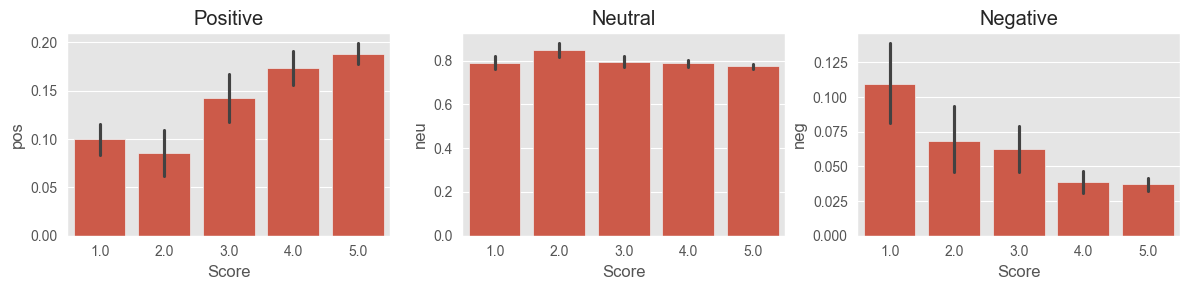

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### Interpretation
**Positive Sentiment**
- As the review score increases, the positive sentiment values (pos) also increase.
This makes sense because higher review scores likely correspond to more positive reviews.

**Neutral Sentiment**
- The neutral sentiment values (neu) are relatively stable across all scores.
This suggests that most reviews contain a significant amount of neutral language.

**Negative Sentiment**
- The negative sentiment values (neg) decrease as the review score increases.
Low scores have higher negative sentiment, while high scores have very low negative sentiment.